# Reproducibale Challenge Project
### Alexander Svensson & Love Sundin
2025-10-21

__(1)__ A well-defined problem


How benign the canser is.

__(2)__ Use data from an existing source, or generate data as part of a simulation experiment

[Länk Data](https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original)

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import keras
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import numpy as np
import keras_tuner

2025-10-16 14:02:08.607495: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760616128.625496   47783 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760616128.630908   47783 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-16 14:02:08.650155: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Read input data and convert
column_names = [
    "Sample code number",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Class"
]
class_dict = {2: "Benign", 4: "Malignant"}
input_df = pd.read_csv("Data files/breast-cancer-wisconsin.data", header=None, names=column_names, na_values=["?"])
input_df["Class"] = input_df["Class"].replace(class_dict)

In [3]:
input_df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
print(input_df.isna().sum())
print(f'Shape original: {input_df.shape}')
input_df = input_df.dropna()
print(f'Shape after drop: {input_df.shape}')

Sample code number              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64
Shape original: (699, 11)
Shape after drop: (683, 11)


In [5]:
# Split into training and test data
training_df, test_df = sklearn.model_selection.train_test_split(input_df, train_size=0.8, test_size=0.2, random_state=688712398)

Text(0.5, 1.0, 'Violin plots')

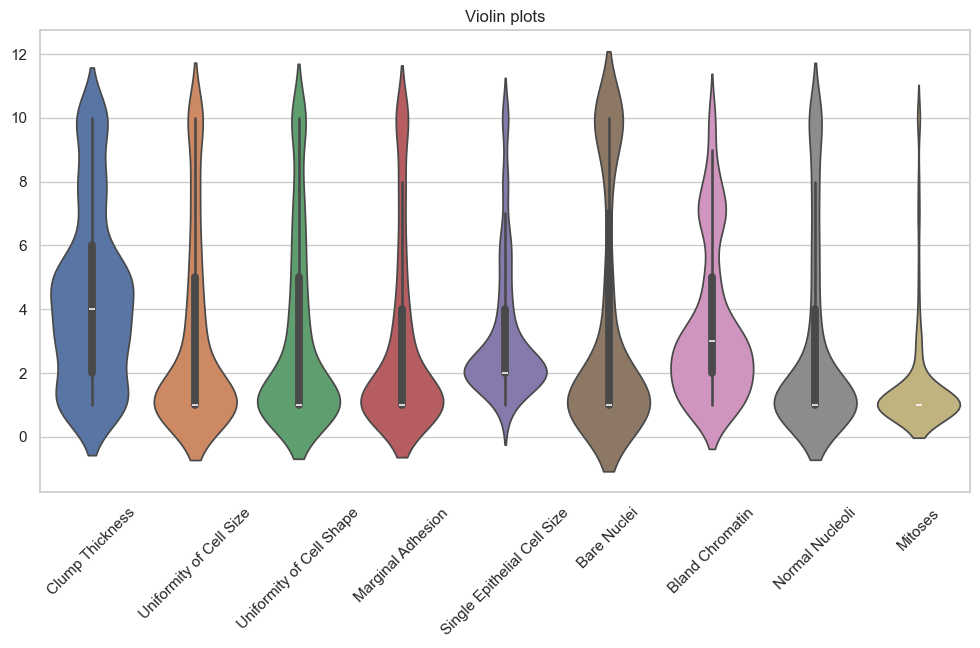

In [6]:
independent_variables = [
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses"
]

sns.set(style="whitegrid")
plt.figure(figsize=(12,6))
sns.violinplot(data=training_df[independent_variables], inner='box')
plt.xticks(rotation=45)
plt.title("Violin plots")

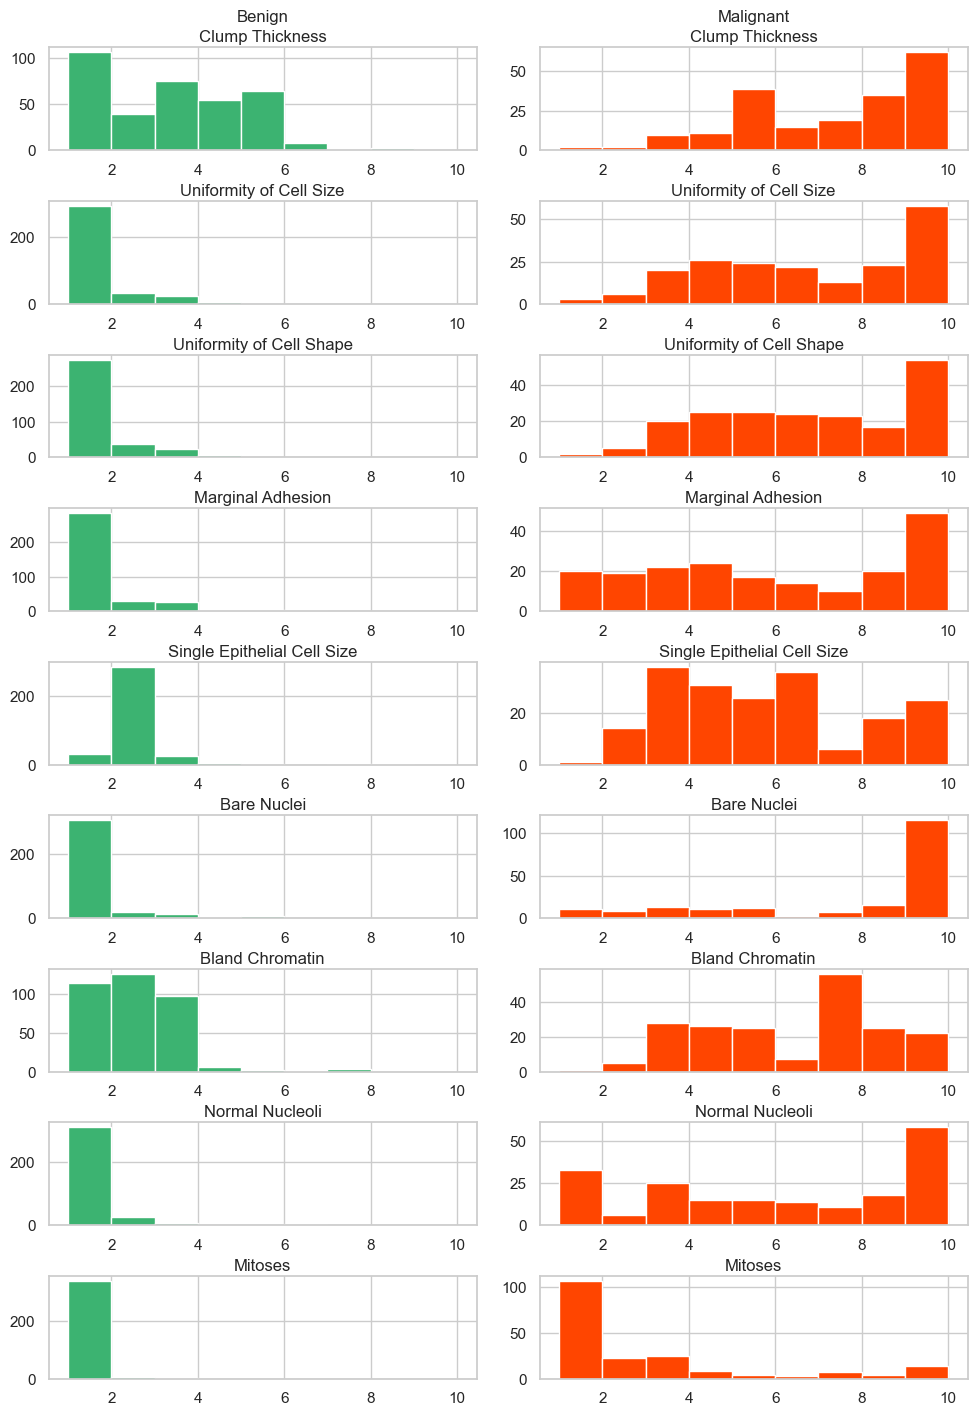

In [7]:
# Plot histograms for all independent variables

possible_classes = class_dict.values()

class_colors = ["mediumseagreen", "orangered"]

figure, axes = plt.subplots(9, 2)
figure.set_size_inches(10, 14)
figure.tight_layout()
bins = range(1, 11)
for class_index, tumor_class in enumerate(possible_classes):
    axis = axes[0, class_index]
    axis.set_title(tumor_class)
for variable_index, variable in enumerate(independent_variables):
    for class_index, tumor_class in enumerate(possible_classes):
        color = class_colors[class_index]
        axis = axes[variable_index][class_index]
        datapoints = training_df.query(f"Class == \"{tumor_class}\"")[variable]
        axis.hist(datapoints, color=color, bins=bins)
        axis.set_xlabel(variable)
        axis.xaxis.set_label_position('top') 

In [8]:
encoding_dict = {"Benign": 0, "Malignant": 1}

x_train = training_df[independent_variables]
y_train = training_df["Class"].replace(encoding_dict)
x_test = test_df[independent_variables]
y_test = test_df["Class"].replace(encoding_dict)

/tmp/ipykernel_47783/2490302067.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_train = training_df["Class"].replace(encoding_dict)
/tmp/ipykernel_47783/2490302067.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_test = test_df["Class"].replace(encoding_dict)


In [21]:
# Function for building a model with the given hyperparameters
def build_model(hyperparameters):
    simple_network = keras.Sequential()
    simple_network.add(keras.layers.Input(shape=(len(independent_variables),)))
    layers = hyperparameters.Int('layers', min_value=1, max_value=2, step=1)
    dropout_rate = hyperparameters.Float("dropout rate", min_value=0, max_value=0.5)
    # learning_rate = hyperparameters.Float("learning rate", min_value=1e-4, max_value=1, step=10, sampling="log")
    layer_nodes = []
    layer_nodes.append(hyperparameters.Int("layer 1 nodes", min_value=4, max_value=64, step=4))
    layer_nodes.append(hyperparameters.Int("layer 2 nodes", min_value=4, max_value=64, step=4))
    for layer in range(layers):
        # nodes
        simple_network.add(keras.layers.Dense(layer_nodes[layer], activation="relu"))
        if dropout_rate>0:
            simple_network.add(keras.layers.Dropout(dropout_rate))
    simple_network.add(keras.layers.Dense(1, activation="sigmoid"))
    simple_network.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-2), loss="binary_crossentropy", metrics=["accuracy", "precision", "recall"])
    return simple_network

In [ ]:
tuner = keras_tuner.BayesianOptimization(
    hypermodel=build_model,
    objective='val_loss',
    executions_per_trial=2,
    directory='Hyperparameter tuning',
    overwrite=True,
    max_trials=50,
    num_initial_points=12,
    project_name='Tumor classification network',
    seed=1879214189
)
early_stopping=keras.callbacks.EarlyStopping("val_loss", patience=5, restore_best_weights=True)
tuner.search(x_train, y_train,
             batch_size=32,
             validation_split=0.2,
             epochs=200, 
             callbacks=[early_stopping])

Trial 50 Complete [00h 00m 19s]
val_loss: 0.03139762673527002

Best val_loss So Far: 0.027721446938812733
Total elapsed time: 00h 15m 02s


In [23]:
#optimized_model=tuner.get_best_models(num_models=1)[0]
#optimized_model.save("optimized_model.keras")

# Get best hyperparameters

best_hyperparameters=tuner.get_best_hyperparameters()[0]
print("Best values of hyperparameters:")
for parameter_name, parameter_value in best_hyperparameters.values.items():
    print(f"{parameter_name}: {parameter_value}")

Best values of hyperparameters:
layers: 2
dropout rate: 0.35966677190794083
layer 1 nodes: 52
layer 2 nodes: 24


In [ ]:
# Train a new model with the best hyperparameters

optimized_model = tuner.hypermodel.build(best_hyperparameters)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
history = optimized_model.fit(x_train, y_train, epochs=200, batch_size=32, validation_split=0.2, callbacks=[early_stopping])
# Save model
optimized_model.save("optimized_model.keras")

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 161ms/step - accuracy: 0.5882 - loss: 0.7897 - precision: 0.4102 - recall: 0.6087 - val_accuracy: 0.9182 - val_loss: 0.4053 - val_precision: 0.8049 - val_recall: 0.9706
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8523 - loss: 0.4151 - precision: 0.7578 - recall: 0.9342 - val_accuracy: 0.9636 - val_loss: 0.2139 - val_precision: 0.9167 - val_recall: 0.9706
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8855 - loss: 0.2923 - precision: 0.8410 - recall: 0.8397 - val_accuracy: 0.9364 - val_loss: 0.1476 - val_precision: 0.8462 - val_recall: 0.9706
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9422 - loss: 0.2102 - precision: 0.9442 - recall: 0.8984 - val_accuracy: 0.9545 - val_loss: 0.1042 - val_precision: 0.8919 - val_recall: 0.9706
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9329 - loss: 0.2107 - precision: 0.9101 - recall: 0.9134 - val_accuracy: 0.9545 - val_loss: 0.113

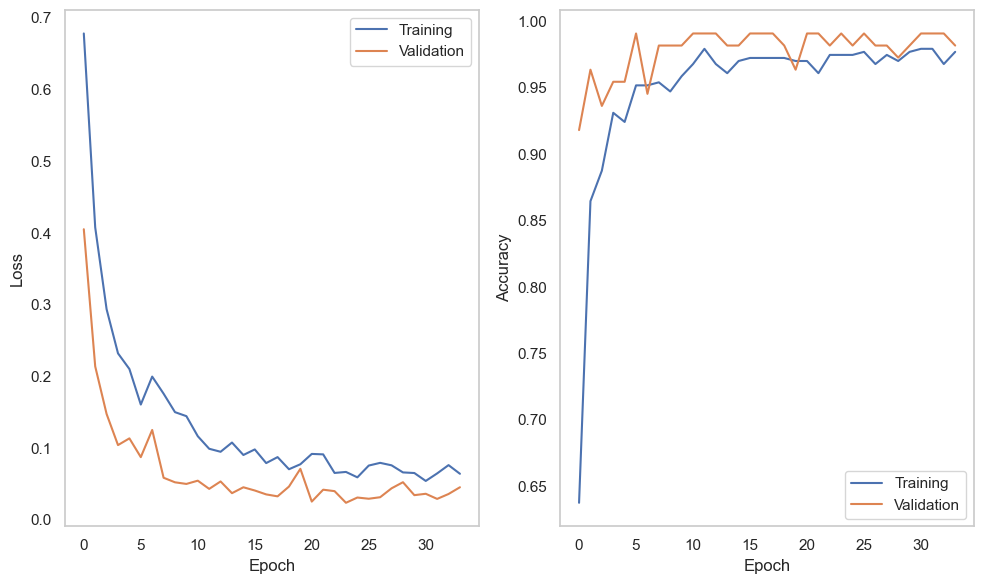

In [25]:
figure, axes = plt.subplots(1, 2)

axis=axes[0]
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
axis.plot(training_loss, label="Training")
axis.plot(validation_loss, label="Validation")
axis.grid()
axis.legend()
axis.set_xlabel("Epoch")
axis.set_ylabel("Loss")

axis = axes[1]
training_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
axis.plot(training_accuracy, label="Training")
axis.plot(validation_accuracy, label="Validation")
axis.grid()
axis.legend()
axis.set_xlabel("Epoch")
axis.set_ylabel("Accuracy")

figure.set_size_inches(10, 6)
figure.tight_layout()

plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        93
           1       0.89      0.93      0.91        44

    accuracy                           0.94       137
   macro avg       0.93      0.94      0.93       137
weighted avg       0.94      0.94      0.94       137



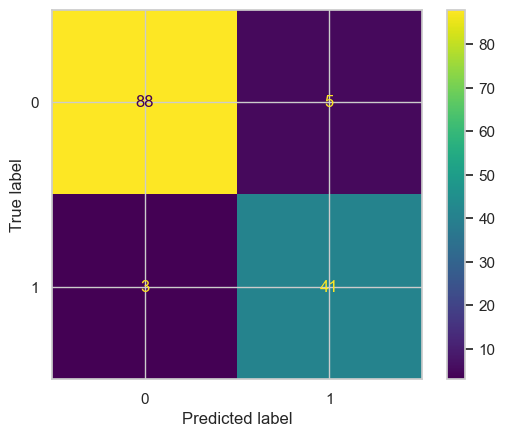

In [26]:
y_pred_prob = optimized_model.predict(x_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        93
           1       0.00      0.00      0.00        44

    accuracy                           0.68       137
   macro avg       0.34      0.50      0.40       137
weighted avg       0.46      0.68      0.55       137



/home/love/Programs/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/love/Programs/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/love/Programs/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

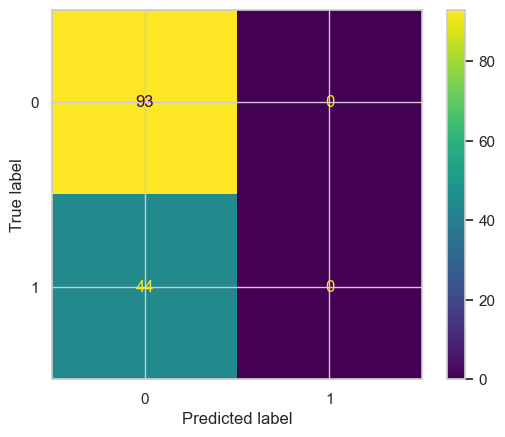

In [27]:
y_pred_majority_class = np.zeros(len(x_test))

cm = confusion_matrix(y_test, y_pred_majority_class)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred_majority_class))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        93
           1       0.88      0.86      0.87        44

    accuracy                           0.92       137
   macro avg       0.91      0.90      0.91       137
weighted avg       0.92      0.92      0.92       137



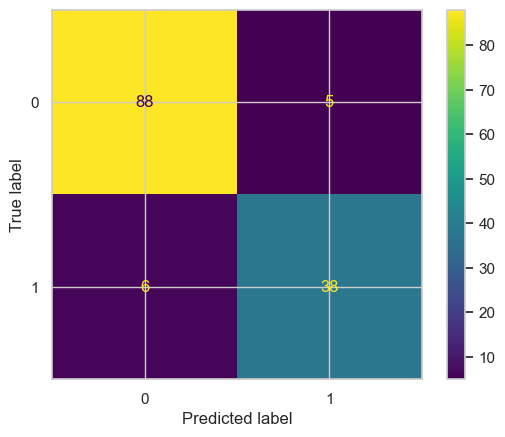

In [28]:
seed = 1245676453
logreg = sklearn.linear_model.LogisticRegression(random_state=seed)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

print(classification_report(y_test, y_pred))

__(3)__ Include data analysis with one or more methods of statistical learning from the course

* Unsupervised Learning – Clustering
* Supervised Learning – Classification
* __Neural Network Implementation__
* __Predictive modelling__

__(4)__ Justify the choice and discussion of limitations of the method

__(5)__ Data visualisation and a discussion of why particular graph styles were chosen.

__(6)__ Reflection on FAIR principles, and how each concept of the acronym relates to the project (data and workflow).

* __F__ - Findable:

In order to make sure the data and workflow is findable it should be easy to fin both for humans and computers. Hence the workflow is opened at GitHub ([Follow Link to GitHub](https://github.com/18alle18/Reproducible-Challenge-Project)) with a README and the following keywords; $\textit{neural-network}$, $\textit{logistic-regression}$ and $\textit{breast-cancer-prediction}$.
* __A__ - Accessible:

Regarding accessibility, the notebook is uploaded under open access and open for preview and downloading for usage at Github. The data is also open to download as a CSV file. The README file explains how to use the notebook, explains the data, lists the license and links the original dataset.

* __I__ - Interoperable:
* __R__ - Reusable:

__(7)__ All of the above should be implemented in a reproducible workflow, e.g. a Jupyter Notebook. Please upload it to complete the final assignment.

__(8)__ Finally, all groups present their project for the class, maximum 10 minutes per group (please rehearse beforehand to ensure that you keep this limit, as the schedule is tight).

# Report

### Introduction and Objective

The purpose of this project was to classify breast cancer tumors as either benign or malignant based on the characteristics of epithelial cells collected from biopsies. We used data from the University of Wisconsin Hospitals, and the process of data collection was described by Wolberg and Mangasarian in 1990 (https://doi.org/10.1073/pnas.87.23.9193). Wolberg and Mangasarian used the multi-surface method for classifying benign and malignant tumor in different stages. The data can be downloaded from the UC Irvine Machine Learning Repository: https://doi.org/10.24432/C5HP4Z.

In our project, we wanted to compare logistic regression with a neural network, to determine if there were complex interactions in the data that could not be captured by logistic regression. We also wanted to determine which cell characteristics were most important for determining if tumors were benign or malignant.

In total, there were 9 independent variables:

- Clump thickness: How many layers cell clumps contained.
- Uniformity of Cell Size
- Uniformity of Cell Shape
- Marginal adhesion: How much the surrounding cells would adhere to the cell clump.
- Single Epithelial Cell size: Diameter of the largest epithelial cell population in relation to the diameter of erythrocytes.
- Bare nuclei: Proportion of epithelial cell nuclei without cytoplasm.
- Bland Chromatin: To what extent the chromatin was smooth, in contrast to clumped.
- Normal nucleli: To what extent nuclei appeared normal.
- Mitoses: Frequency of mitosis.

These variables were encoded as discrete variables between 1 and 10.

### Methodology for each task

### Results with supporting visuals

### Interpretation of Findings

### Conclusion summarizing key insights